In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#classification data set use karneka quki ans want in yes or no issliye


In [7]:
#here we trained the data wd classification algorithum
#seprate input and output variable
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [10]:
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model
   

In [11]:
from sklearn.metrics import classification_report

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr=LogisticRegression()

In [14]:
create_model(lr)#not good recall that means model overfit

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



LogisticRegression()

In [15]:
from sklearn.tree import DecisionTreeClassifier


In [16]:
dt1=DecisionTreeClassifier()


In [17]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.63      0.54      0.58        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



In [18]:
dt1.feature_importances_

array([0.04508942, 0.27212172, 0.15980105, 0.06881264, 0.04193833,
       0.17875902, 0.12769286, 0.10578496])

In [19]:
from sklearn import tree

In [20]:
feature=x.columns

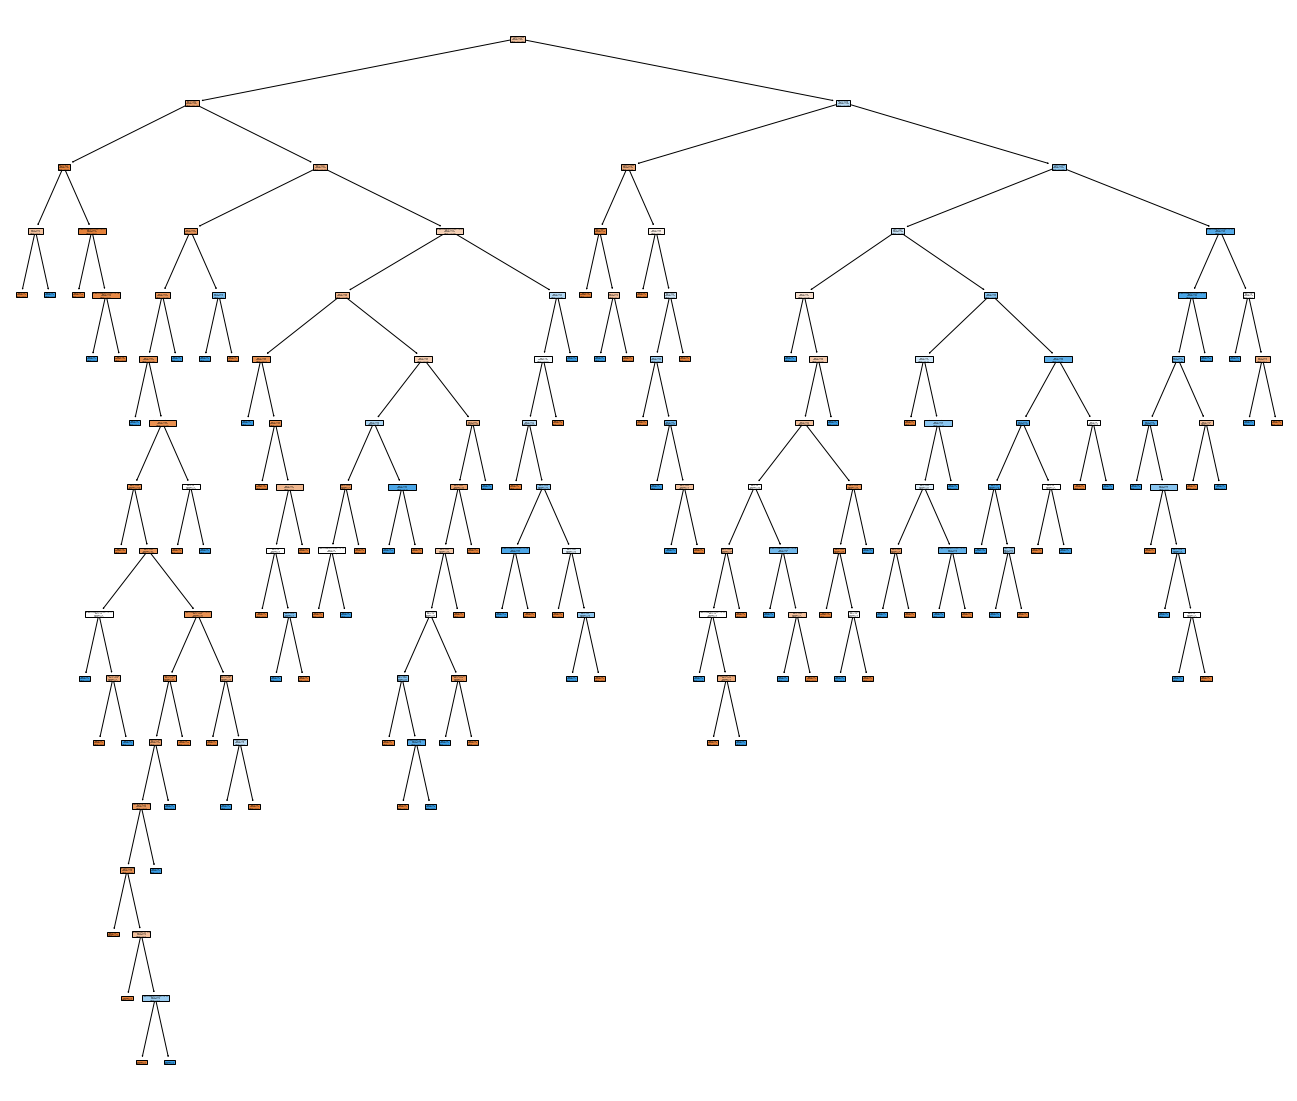

In [21]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=feature,filled=True)

In [22]:
#to reduce overfitting situation use puring technique
dt2=DecisionTreeClassifier(max_depth=5)


In [23]:
create_model(dt2)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       146
           1       0.69      0.66      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.76      0.77      0.76       231



DecisionTreeClassifier(max_depth=5)

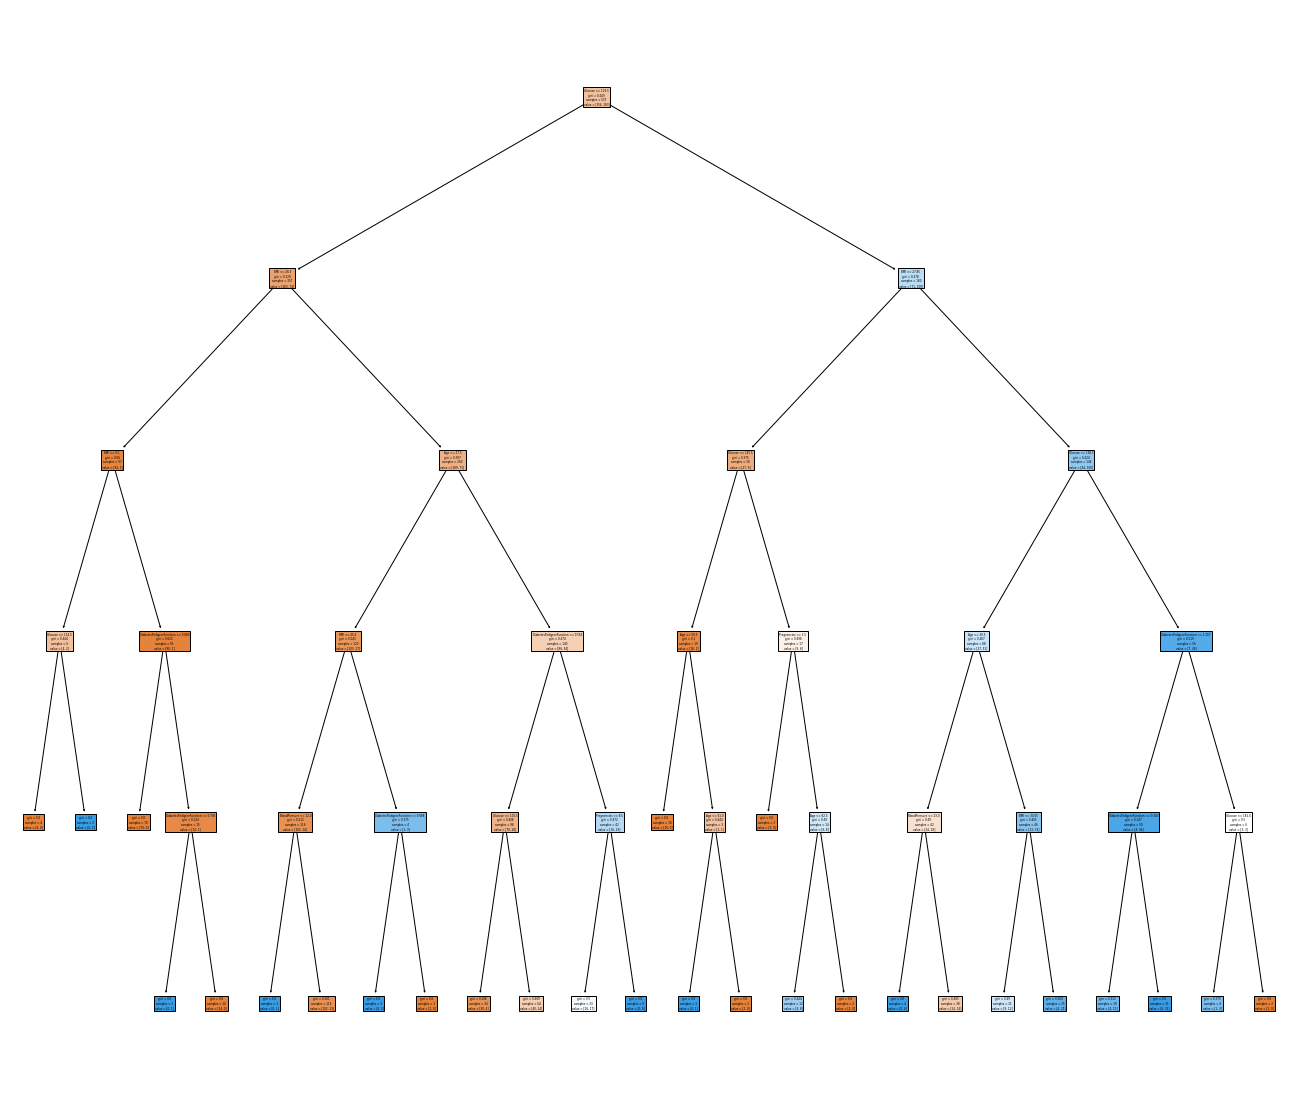

In [24]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt2,feature_names=feature,filled=True)

In [25]:
dt2.feature_importances_

array([0.04226752, 0.46375006, 0.03806413, 0.        , 0.        ,
       0.2186186 , 0.11080672, 0.12649298])

In [26]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [27]:
#use 2nd technique min_sample_leaf
dt3=DecisionTreeClassifier(min_samples_leaf=45)
#min=[50]

In [28]:
dt3=create_model(dt3)#good recall 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231



In [29]:
dt4=DecisionTreeClassifier(min_samples_leaf=20,criterion="entropy")
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       146
           1       0.69      0.74      0.72        85

    accuracy                           0.78       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79      0.78      0.78       231



In [30]:
#max_sample technique of puring is best but then to 2 nd algo of classification 

In [31]:
#svm=support vactor  machine
from sklearn.svm import LinearSVC #linearly distrubuted


In [32]:
svc=LinearSVC(random_state=1,C=.001)

In [33]:
create_model(svc)#recall kam quki data linear sepratable/distrubutd nahi hey

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       146
           1       0.59      0.28      0.38        85

    accuracy                           0.66       231
   macro avg       0.63      0.58      0.57       231
weighted avg       0.64      0.66      0.63       231



LinearSVC(C=0.001, random_state=1)

In [34]:
#ensembling technique
#)RandomForestTree
from sklearn.ensemble import RandomForestClassifier


In [35]:
rf=RandomForestClassifier(n_estimators=15,max_features=5,random_state=1)


In [36]:
create_model(rf)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



RandomForestClassifier(max_features=5, n_estimators=15, random_state=1)

In [37]:
#ada boost means adaptor boost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [38]:
ada=AdaBoostClassifier()

In [39]:
 create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.59      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



AdaBoostClassifier()

In [40]:
gbc=GradientBoostingClassifier(n_estimators=100)

In [41]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.65      0.70        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



GradientBoostingClassifier()

In [42]:
#sampling technique since recall is not good
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

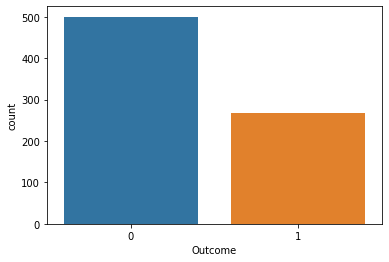

In [43]:
sns.countplot(data=df,x="Outcome")
plt.show()

In [44]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



In [45]:
ros=RandomOverSampler()

In [46]:
x_sample2,y_sample2=ros.fit_sample(x_train,y_train)

In [47]:
pd.Series(y_sample2).value_counts()


1    354
0    354
Name: Outcome, dtype: int64

In [48]:
dt2=DecisionTreeClassifier(max_depth=3)#purniing tech #depth cannot more tyan 8 

In [49]:
dt2.fit(x_sample2,y_sample2)#we train model

DecisionTreeClassifier(max_depth=3)

In [50]:
y_pred=dt2.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.55      0.70       146
           1       0.55      0.94      0.70        85

    accuracy                           0.70       231
   macro avg       0.75      0.75      0.70       231
weighted avg       0.80      0.70      0.70       231



In [52]:
#best recall in oversample yet check in undersample

In [53]:
#undersample
rus=RandomUnderSampler()

In [54]:
x_sample1,y_sample1=rus.fit_sample(x_train,y_train)

In [55]:
pd.Series(y_sample1).value_counts()

1    183
0    183
Name: Outcome, dtype: int64

In [56]:
dt3=DecisionTreeClassifier(max_depth=2)#purniing tech #depth cannot more tyan 8 

In [57]:
dt3.fit(x_sample1,y_sample1)#we train model

DecisionTreeClassifier(max_depth=2)

In [58]:
y_pred=dt3.predict(x_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.57      0.69       146
           1       0.54      0.88      0.67        85

    accuracy                           0.68       231
   macro avg       0.72      0.73      0.68       231
weighted avg       0.76      0.68      0.69       231



In [60]:
#best technique is  oversampling where we get recall as 0.92